In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [ ]:
n = 100
x = np.arange(n)
y_truth = 2 * x

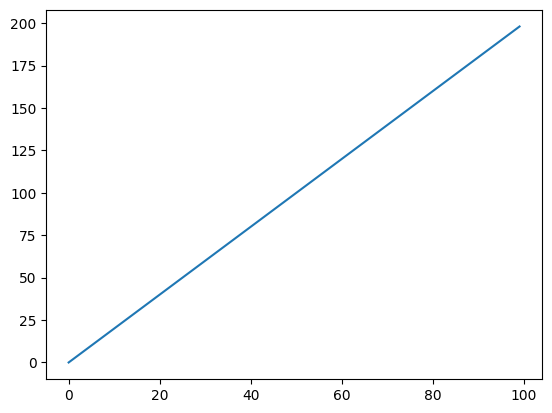

In [ ]:
plt.plot(x, y_truth)

In [ ]:
y_noisy = y_truth.copy()
noise = np.random.uniform(-25,25,20).astype(int)
noise2 = np.random.normal(0, 50, 20).astype(int)
y_noisy[20:40] = y_noisy[20:40] - 5 * x[20:40] + noise
#y_noisy[60:80] = y_noisy[60:80] + noise2

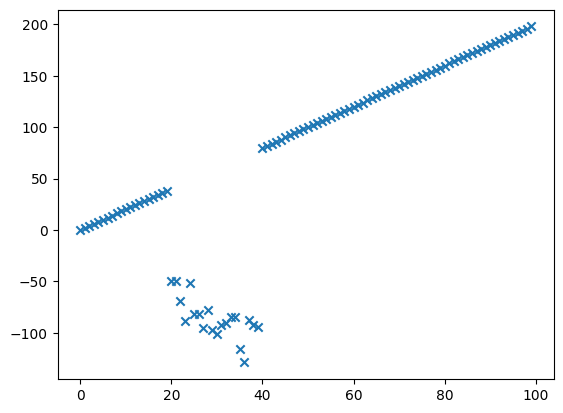

In [ ]:
plt.scatter(x, y_noisy, marker='x')

In [ ]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
estimators = {
    'OLS': LinearRegression(),
    'TSR': TheilSenRegressor()
}
y_preds = {
    'OLS': None,
    'TSR': None
}

for l,estimator in estimators.items():
  y_preds[l] = estimator.fit(x.reshape(-1, 1), y_noisy).predict(x.reshape(-1, 1))
  print("Estimator {0}: r2 {1}, mad {2}".format(l, r2_score(y_truth, y_preds[l]), mean_absolute_error(y_truth, y_preds[l])))

Estimator OLS: r2 0.6386356588674167, mad 29.238947254725485
Estimator TSR: r2 0.9999999998236148, mad 0.0006883276292595319


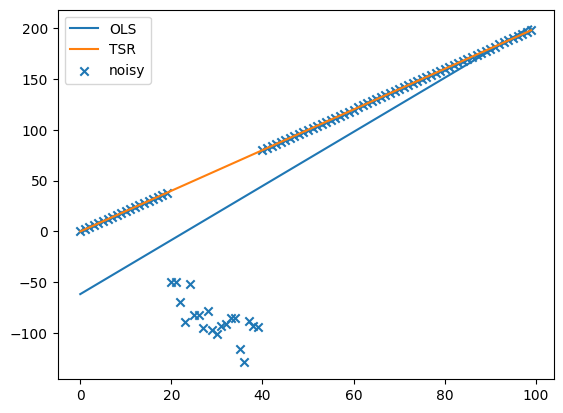

In [ ]:
for l,estimator in estimators.items():
  plt.plot(x, y_preds[l], label=l)
plt.scatter(x, y_noisy, marker='x', label='noisy')
plt.legend()

In [ ]:
tips = sb.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tipsNormalized = pd.get_dummies(tips)
tipsNormalized.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True


In [ ]:
X = tipsNormalized.copy()
del X['tip']
X = X.to_numpy()
X.shape

(244, 12)

In [ ]:
y = tipsNormalized['tip'].copy().to_numpy()
y.shape

(244,)

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
rcv = RidgeCV(alphas=np.array([.05,0.07,0.09,.1,.2,.5]))
rcv.fit(X, y)
print("Best alpha for Ridge on dataset: {}".format(rcv.alpha_))

Best alpha for Ridge on dataset: 0.5


In [ ]:
print("Amount of non-zero coefficients: {0}".format(np.sum(rcv.coef_ != 0)))

Amount of non-zero coefficients: 12


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X, y)
np.sum(lasso.coef_ != 0)

1

In [ ]:
lasso.coef_[:5]

array([ 0.09235476,  0.        ,  0.        , -0.        , -0.        ])

In [ ]:
rcv.coef_[:5]

array([ 0.09449773,  0.17550312, -0.01611368,  0.01611368, -0.04286089])

In [ ]:
from sklearn.linear_model import Lars

In [ ]:
lars = Lars(n_nonzero_coefs=3)
lars.fit(X, y)

Lars(n_nonzero_coefs=3)

In [ ]:
print("Amount of non-zero coefficients: {0}".format(np.sum(lars.coef_ != 0)))

Amount of non-zero coefficients: 3


In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_samples=200, n_features=20, n_informative=11, noise=2)

In [ ]:
[x.shape, y.shape]

[(100,), (200,)]

In [ ]:
# amount of features used: if does not preserve many, the solution is said to be sparse